<a href="https://colab.research.google.com/github/KrushnaChaure/play-store-app-review-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## In today world of internet smartphone playing a crucial role with the help of apps which is present in smartphone which is using by human.

So why should we use this apps????

No doubts there are multiple advantages of using apps:


*   Communication and Engagement with customer,friends,family
*   Handling Businesses

*   Fun & Entertainment 

*   Study and Education


*   Day to Day life and their are many more......



## Importance of Apps data and Review analysis



*   So devloper devloping and design apps but its important to know that what types of 
requirement of customer.

*   To help targeting the most impactful improvement to app,can view top trends and issues that the customer mentions.
*   Through comprehensive analysis of designated apps, optimizing the ratings and reviews maintains high reputation.

*   The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product.


## So we are using Exploratory Data Analysis(EDA) which help us to understand customer demands better and doing visualization over them to deliver some insights to devloper.

Lets now deep dive into our input data files:


*   Play Store Data.csv - It contains the basic details of the app like number of user reviews, ratings, etc.
*   User Reviews.csv - It contains the user reviews and its sentiment score for the respective app.



## Now lets importing necessary packages and libraries

In [23]:
import numpy as np                       # doing numerical operatoin over data(1 dimensional)
import pandas as pd                      # doing operation over dataframe object like row and column label data(2 dimensional)
import matplotlib.pyplot as plt          # doing data visualization
import seaborn as sns                    # doing data visualization
%matplotlib inline                       
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend   
from matplotlib import style             

## Lets first mount the drive to connect dataset to the notebook 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# Now reading the dataset path
df_apps_data = pd.read_csv('/content/drive/MyDrive/Almabetter/Module1/Capstone Projects/Play Store Data.csv') 
df_apps_review= pd.read_csv('/content/drive/MyDrive/Almabetter/Module1/Capstone Projects/User Reviews.csv')

In [ ]:
df_apps_data.head()                     # it give us top 5 dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Below is description of columns/variable in our Play Store Data

*   App --- It contains the name of the app with a short description.
*   Category--- This section gives the category to which an app belongs.

*    Rating--- It gives the average rating gives by customer with respective app which lies between 1 to 5.

*   Reviews--- The number of users that have dropped a review for the respective app.

*   Size--- How much space required to install app.
*   Installs--- The approximate number of times the respective app was installed.


*   Types--- Its shows whether this app free or paid.


*   Price--- It gives the price payable to install the app. For free type apps, the price is zero.

*   Content Rating--- It states which age group is suitable to consume the content of the respective app.

*   Genres--- It state whether its which type of app.
*   Last Updated--- It gives the day in which the latest update for the respective app was released.


*   Current Version--- It gives the current version of the respective app belongs.

*   Android Version--- It gives the android version of the respective app belongs.


In [ ]:
df_apps_review.head()              # It give us top 5 dataframe

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Below is description of columns/variable in our User Review

*   App--- It contains the name of the app with a short description.

*   Translated_Review--- It contains the English translation of the review dropped by the user of the app.

*   Sentiment--- It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
*   Sentiment_Polarity--- It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.


*   Sentiment_Subjectivity--- This value gives how close a reviewer’s opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewer’s opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.


In [ ]:
# Getting the how many rows and columns in our dataframe
df_apps_data.shape

(10841, 13)

In [ ]:
df_apps_review.shape

(64295, 5)

In [ ]:
# Getting column names
df_apps_data.columns 

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df_apps_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# Getting information about our dataframe
df_apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df_apps_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# Now getting overall descriptive summary of dataframe
df_apps_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df_apps_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


Hurray!!!
Now we are familiar with our both dataframe and knowing all basic information  of our both dataframe & understand them very well

Now its time to doing some operation on this datframe and find some insights from them

## Data Cleaning
Why this data cleaning is important ????

*   Wrong,inconsistent data can lead us to do false conclusion and due to this their chances to present falsy data visualization which affect badly over businesses also its misdirect the businesses and our clients.
*   Data cleaning allow us to generate accurate,defensible data to doing accuratly analysis over them.

*   So accuratly analysis lead us to doing precisely data visualization and help us making good businesses decisions.





So during running the code in row number 10472 found mismatch data on that row so we remove this row. 

In [25]:
# we remove this row
df_apps_data=df_apps_data.drop(10472)

Also in Installs column there are present **'+' & ','** in front of values so we converting it into numeric

In [26]:
# Simply with the help of replace function we convert '+' to blank space '' & converting ',' to blank space ''
df_apps_data['Installs']= df_apps_data['Installs'].str.replace('+','').str.replace(',','')
# Converting data type into float using astype 
df_apps_data['Installs'] = df_apps_data['Installs'].astype(float)
pd.to_numeric(df_apps_data['Installs'], errors='coerce')   
type(df_apps_data['Installs'])                                                        # Finding which type of dataframe using type

pandas.core.series.Series

In [27]:
# While running this code, it throw Future warning to handle this we use import warnings

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [28]:
df_apps_data['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10840, dtype: float64

Same query happen in Price column so we want to convert '$' to numeric data 

In [53]:
# With the help of replace function we convert '$' to blank space ''
df_apps_data['Price'] = df_apps_data['Price'].str.replace('$','')
# Converting data to float form
df_apps_data['Price'] = df_apps_data['Price'].astype(float)

Also in size column we want to convert 'M' & 'k' '+' ',' into numeric data

In [30]:
# converting 'M' to blank space ''
df_apps_data['Size']= df_apps_data['Size'].str.replace('M','').str.replace('k','').str.replace('+','').str.replace(',','')
# to remove null values from size column
df_apps_data.loc[df_apps_data['Size'].isnull(),'Size']=0
# also in size column there are some value which is 'Varies with device' so its converting to the 'NaN'
df_apps_data['Size']= df_apps_data['Size'].replace('Varies with device',np.nan)
# Converting to float
df_apps_data['Size'] = df_apps_data['Size'].astype(float)                  

In [31]:
df_apps_data['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

Also in Current Ver column and Android ver column there are 'Varies with device' converting to the 'NaN'

In [ ]:
# In 'Current Ver' column converting 'Varies with device' to the 'NaN' with the help of replace function
df_apps_data['Current Ver']= df_apps_data['Current Ver'].replace('Varies with device',np.nan)
# In 'Android Ver' column converting 'Varies with device' to the 'NaN' with the help of replace function
df_apps_data['Android Ver']= df_apps_data['Android Ver'].replace('Varies with device',np.nan)

In [33]:
df_apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",NaN,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
df_apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     9373 non-null   object 
 12  Android Ver     9476 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


## Now we are doing some analysis & visualization on Play Store Data

## 1.First Observation

Firstly we understanding trend where which types of apps availables more in play store.   

*   with the help of Category column we using bar plot here do visualization


*   It help us to understand which category is most and which category has lower in play store so according to that we find which category has more market and tell the devloper to make apps according that type of requirement 








In [ ]:
# Calculate How many apps avaliable with their type using value_counts method
trend= df_apps_data['Category'].value_counts()
trend

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

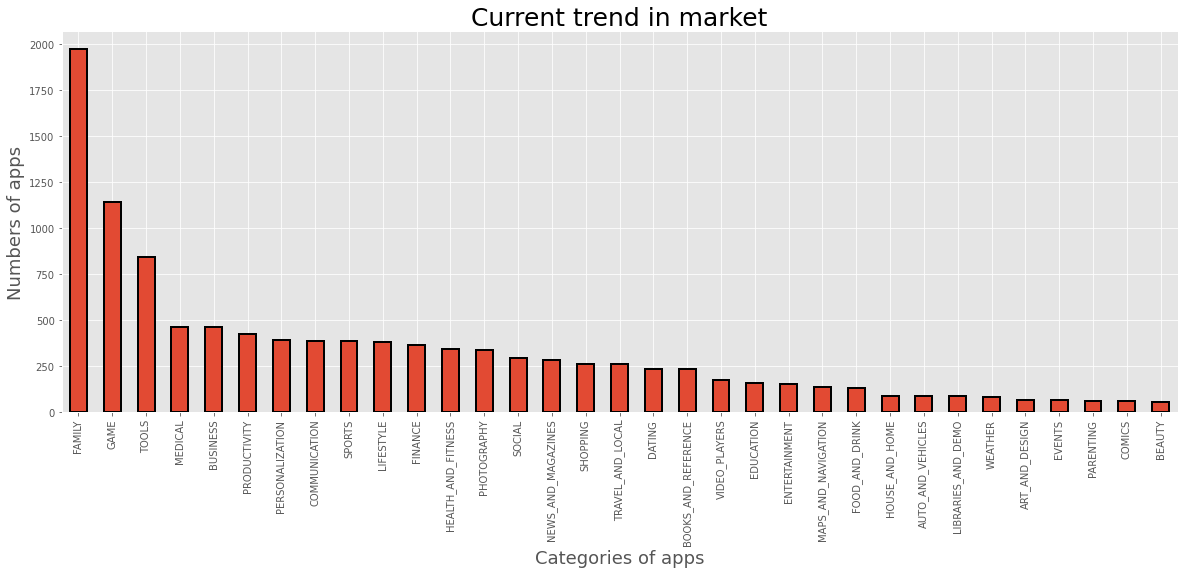

In [ ]:
trend_market=trend.plot.bar(figsize=(20,7),linewidth=2,edgecolor='black')                         # We are using barplot here and set the display figure size 
trend_market.set_title('Current trend in market',fontsize=25)                                     # Set the title 
trend_market.set_xlabel('Categories of apps',fontsize=18)                                         # Set the x label
trend_market.set_ylabel('Numbers of apps',fontsize=18)                                            # Set the y label
plt.show()

As above chart we analysis that and finding some insights 

*   Family and Game have maximum number of apps available in play store where Comics and Beauty has less number of apps in play store 
*   So absolutly trend is goes towards families and gamings types of apps which has maximum numbers of apps available in market  

*   So this analysis very helpful to improve to making business decision like where we focused, where is more opportunity to grab the market and where we skipped, where is less market 






## 2.Second Observation

So here we also analyzing the trend that which apps have intalled maximum numbers of times

*   So its help us find that where is current market goes

*   Which type of apps have popular in play store and which type of apps have less popular in play store according to their installation


*   We using Installs and Category column for analysis



In [ ]:
# With the help of group by function we calculate installation according their category using sum function 
installation= df_apps_data.groupby('Category')[['Installs']].sum().sort_values(by='Installs',ascending= True)
installation.head()

,Installs
Category,
EVENTS,15973161.0
BEAUTY,27197050.0
PARENTING,31521110.0
AUTO_AND_VEHICLES,53130211.0
MEDICAL,53257437.0


<Figure size 1440x504 with 0 Axes>

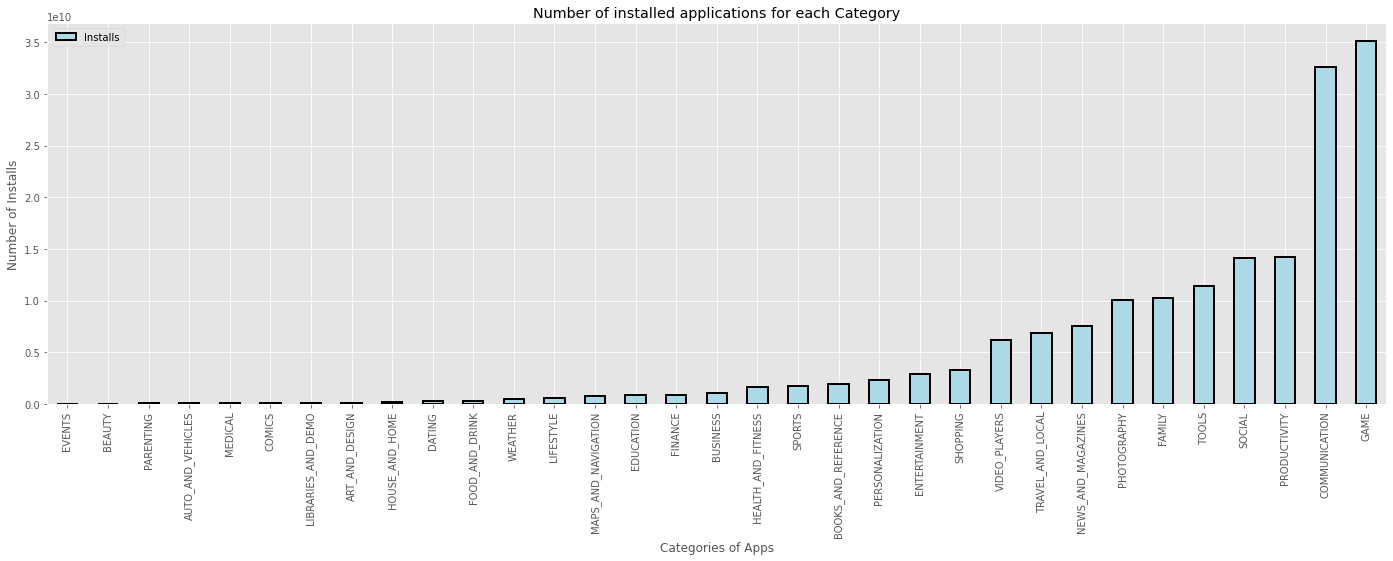

In [ ]:
plt.figure(figsize=(20,7))                                                                     # Set the display figure size
# Using bar plot
installation.plot(kind='bar',linewidth=2,edgecolor='black',color='lightblue')                  # setting edgecolor,line width,column color
plt.xlabel("Categories of Apps")
plt.ylabel("Number of Installs")
plt.title("Number of installed applications for each Category")
plt.show()

As above bar chart we analysis that and finding some insights

*   No doubt where gaming and communication type of apps are top in list where they installs user maximum time 
*   Events type of apps not installed any user

*   From Beauty to Business type of apps are very less installation 

## 3.Third Observation

In this observation we uses pie chart to analysis

*   This is most important aspect to understand the customer preference


*   How much apps in play store are paid and how much apps in play store are free

*   We understand current situation of market and decide our product price where its free or paid





In [ ]:
# Calculating how many free and paid appa avaliable with the help of value_counts method
df_pie = df_apps_data['Type'].value_counts()

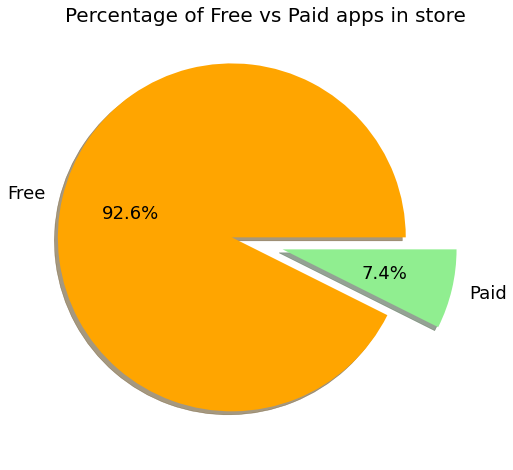

In [ ]:
# Using Pie chart
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(20,8)
plt.rcParams['font.size']=(18)

labels = ['Free','Paid']
explode = [0.2,0.1]
colors = ['orange', 'lightgreen']       
plt.pie(df_pie,labels=labels,explode=explode,colors=colors,shadow=True,autopct='%1.1F%%')
plt.title('Percentage of Free vs Paid apps in store',fontsize=20)
plt.show()

As above pie chart we analysis that and finding some insights

*   There are 92.6% apps are free to use in play store which is almost all the market 
*   There are only 7.4% paid apps in play store



## 4.Fourth Obsevation

Now we are using countplot to analysing 

1.   Volume of diffrent type of age group to using apps



*   Which type of apps open or access to use for which type of age group  
*   Here we analysing how many apps are accessible according to their specific age group 



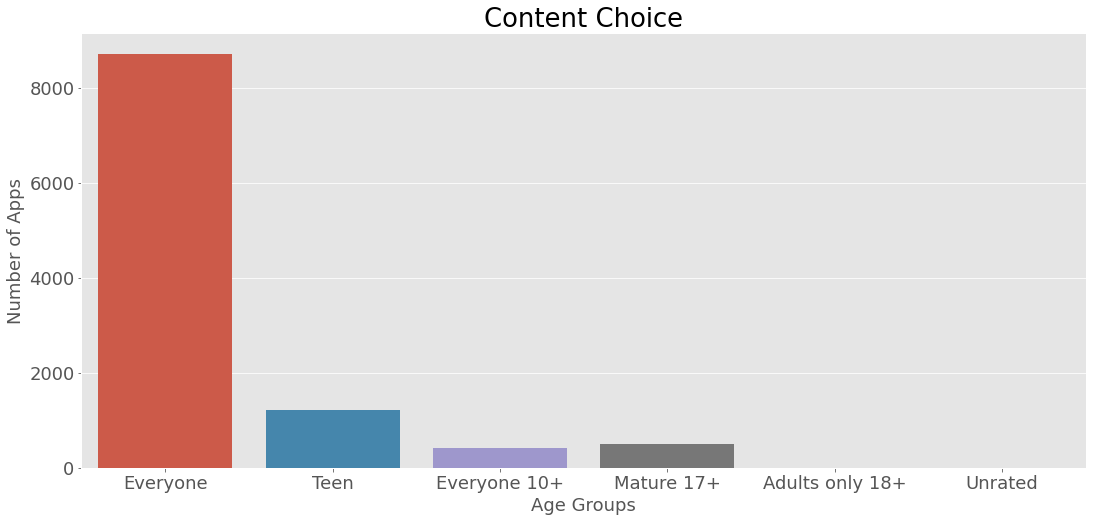

In [ ]:
# Using countplot
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(18,8)
plt.rcParams['font.size']=(18)

sns.countplot('Content Rating',data=df_apps_data)
plt.title('Content Choice')
plt.xlabel('Age Groups',fontsize=18)
plt.ylabel('Number of Apps',fontsize=18)
plt.show()

As above counterplot we analysis that and finding some insights

*   We see clearly that most of the apps in play store are accessible for everyone, their is any restriction to use this apps 
*   There is minimum numbers of apps are in play store where there is use only Teen,Everyone10+,Mature 17+ 

*   There is no any apps in play store have restriction like they use only Adults only 18+,Unrated





## 5.Fifth Observation

So here we comparing average ratings of diffrent Categories of apps

Devlopers making diffrent type of apps but its important to understand how our product is so here we understand the feedback of different type of apps

*   How people think with respective using diffrent apps
*   They satisfy or not using apps

*   So with help of rating basis we understand user or customer

*   We using two diffrent plot to understand:-

1.   Line Plot
2.   Bar Plot











In [ ]:
# we group together of Category and Rating column and finding average rating of each type of apps using mean()
avg_rating=df_apps_data.groupby('Category')['Rating'].mean()
avg_rating

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

1.Line Plot

Text(0, 0.5, 'Frequency of Rating')

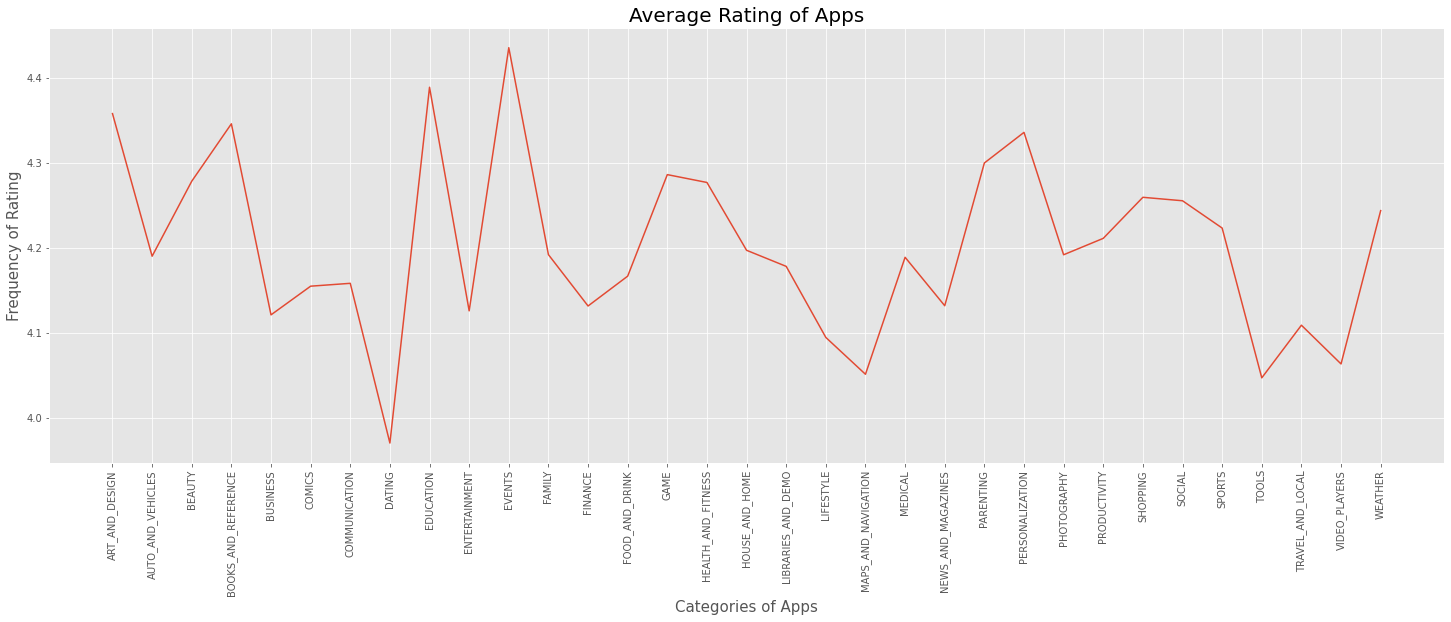

In [ ]:
# using Line Plot
plt.rcParams['figure.figsize'] = (25,8)
plt.plot(avg_rating)
plt.title('Average Rating of Apps',fontsize=20)
plt.xlabel('Categories of Apps',fontsize=15)
plt.xticks(rotation=90)                                      # Rotating xlable name in 90 degree
plt.ylabel('Frequency of Rating',fontsize=15)

As above Line plot we analysis that and finding some insights

*   Most of the apps rating are between in 4 to 4.5
*   Where highest rating to Education base and Event base apps

*   Where lowest rating got to the Dating and Tools apps





2.Bar Plot

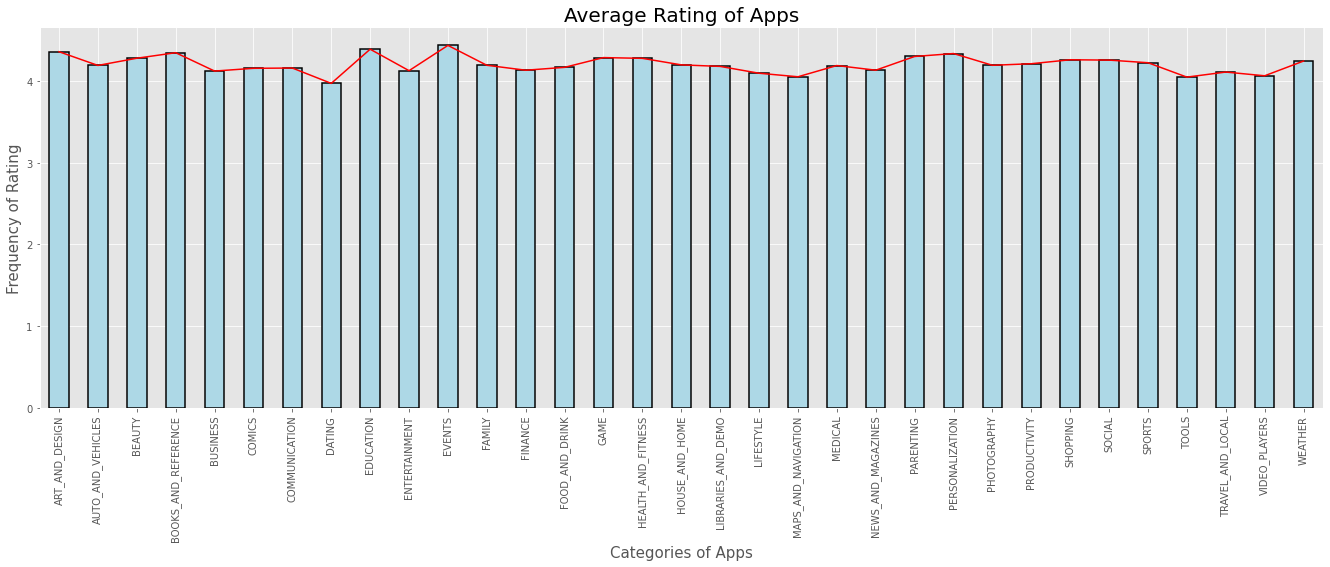

In [ ]:
# using Bar Plot
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (23,7)

avg_rating.plot(color='red')
avg_rating.plot(kind='bar',linewidth=1.5,edgecolor='black',color='lightblue')
plt.title('Average Rating of Apps',fontsize=20)
plt.xlabel('Categories of Apps',fontsize=15)
plt.ylabel('Frequency of Rating',fontsize=15)
plt.show()

As above bar plot we analysis that and finding some insights

*   most of the average ratings of diffrent types of apps are between 4 to 4.5  



## 6.Sixth Observation

Here we using scatter plot to analysis

*   Here we understand relationship between two variable 
*   how size affect the numbers of installtion in each category of apps

*   We understand the customer preference according to apps size and installation

*   Also understanding relationship between free and paid apps
*   How free & paid apps affect over installation



/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


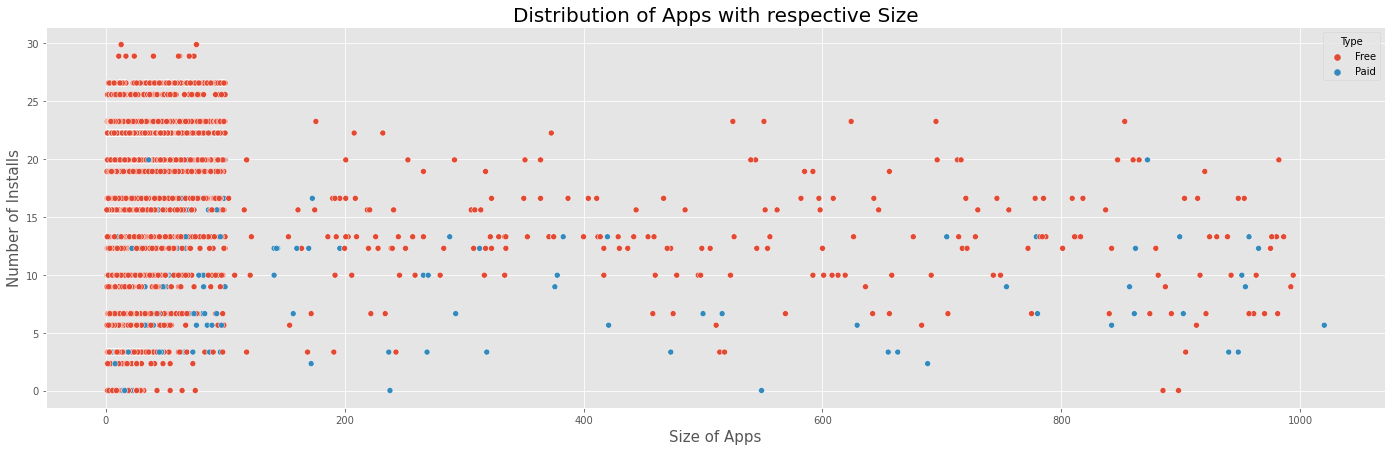

In [ ]:
# We create new installs column with the help of np.log2
df_apps_data['New_installs'] = np.log2(df_apps_data['Installs'])   

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (24,7)                                      # Set display figure size                                         
# Using seaborn visualization library with scatter plot
sns.scatterplot(df_apps_data['Size'],df_apps_data['New_installs'],hue = df_apps_data['Type'])
plt.title('Distribution of Apps with respective Size', fontsize = 20)
plt.xlabel('Size of Apps',fontsize =15)
plt.ylabel('Number of Installs',fontsize=15)
plt.show()

As above scatter plot we analysis that and finding some insights

*   It clearly show that where size of apps smaller then it will get higher installation
*   Where size of apps increases then installation decreases

*   Also we look deeply into that there free apps are more installed compare to paid apps





In [12]:
df_apps_data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


## 7.Seventh Observation

Now here we understand the Correlationship between two variable 

*   Here we use heat map which shows the relationship between two items and provides rating information, such as high to low or poor to excellent
*   Main purpose to use heap map here is better visualize the volume of locations within a dataset and assist in directing viewers towards areas on data visualizations that matter most

*   Heat map displays the rating information using varying colors or saturation





In [78]:
# Firstly we store value in new variable df_heatmap from respective column we want
df_heatmap= df_apps_data[['Rating','Size','Installs','Price']]
df_heatmap

,Rating,Size,Installs,Price
0,4.1,19.0,10000.0,0.0
1,3.9,14.0,500000.0,0.0
2,4.7,8.7,5000000.0,0.0
3,4.5,25.0,50000000.0,0.0
4,4.3,2.8,100000.0,0.0
...,...,...,...,...
10836,4.5,53.0,5000.0,0.0
10837,5.0,3.6,100.0,0.0
10838,NaN,9.5,1000.0,0.0
10839,4.5,NaN,1000.0,0.0


In [79]:
df_corr=df_heatmap.corr()
df_corr

,Rating,Size,Installs,Price
Rating,1.000000,-0.018843,0.051355,-0.021903
Size,-0.018843,1.000000,0.014753,0.014495
Installs,0.051355,0.014753,1.000000,-0.011689
Price,-0.021903,0.014495,-0.011689,1.000000


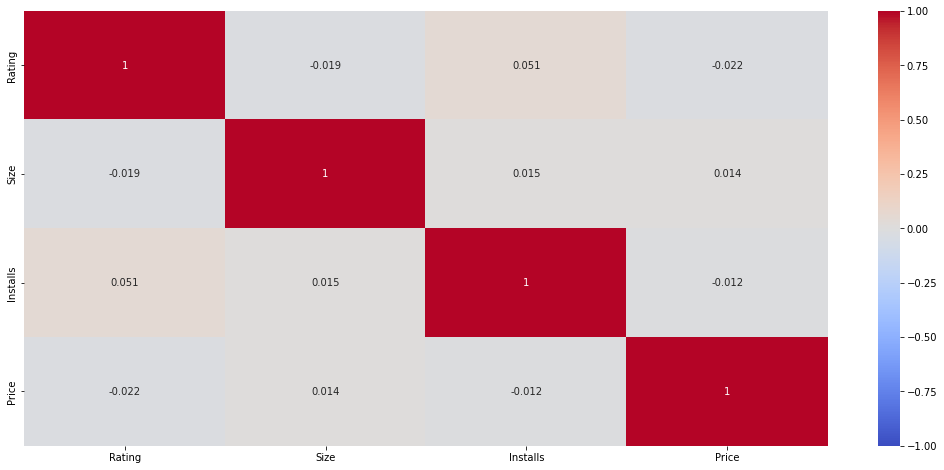

In [80]:
# using heatmap to understand correlation
plt.figure(figsize=(18,8))
sns.heatmap(df_heatmap.corr(), vmin=-1, cmap='coolwarm', annot=True)                               # color taken from seaborn visualization palettes

As above Heatmap we analysis that and finding some insights

*   In heatmap we using lot of correlation like Rating,Size,Installs,Price
*   Where we see that there is slightly positive feedback or rating between Installs and Rating and there negative rating between Size and Rating
*   Also there is negative feedback or rating between Price and Rating





# **Now its time to play dataset of User Reviews**
# **So we understand User Reviews and doing analysis over them and finding some insights**

As we allready read User reviews path in top of this colab notebook
Also we discuss information about User Reviews in top of colab notebook

In [81]:
df_apps_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## 8.Eighth Observation

Here we using pie chart to understand

*   Pie chart shows relative proportions of multiple classes of data
*   Here we understand the Sentiment of customer which is divided in three type like Positive,Negative,Neutral form



In [91]:
# Calculating how many postive,negative and neutral sentiment in dataset using value_counts method
df_sent_pie= df_apps_review['Sentiment'].value_counts
df_sent_pie

<bound method IndexOpsMixin.value_counts of 0        Positive
1        Positive
2             NaN
3        Positive
4        Positive
           ...   
64290         NaN
64291         NaN
64292         NaN
64293         NaN
64294         NaN
Name: Sentiment, Length: 64295, dtype: object>

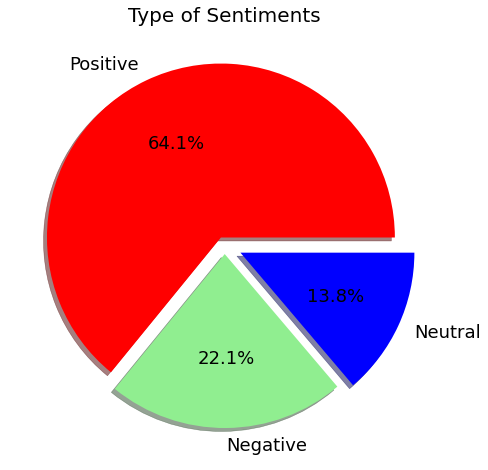

In [101]:
# Using Pie chart
plt.style.use('ggplot')
# Set the display figure size
plt.rcParams['figure.figsize']=(20,8)
plt.rcParams['font.size']=(18)
# Giving the label name
labels = ['Positive','Negative','Neutral']
# Distance between each property
explode = [0.05,0.05,0.1]
colors = ['red', 'lightgreen','blue']       
plt.pie(df_sent_pie,labels=labels,explode=explode,colors=colors,shadow=True,autopct='%1.1F%%')
plt.title('Type of Sentiments',fontsize=20)
plt.show()

As above Pie chart we analysis that and finding some insights

*   It clearly shows that Positive feedback has maximum in this list where they grab 64.1% where it means customer are happy and satisfy using apps
*   Where Negative and Neutral feedback less in this which is 22.1% & 13.8% respectively

